<a href="https://colab.research.google.com/github/cesarKadir/Optimizing-functions/blob/main/Testing%20a%20few%20libraries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
!pip install git+https://github.com/google-research/tensorflow_constrained_optimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/google-research/tensorflow_constrained_optimization to /tmp/pip-req-build-sg_uoldv
  Running command git clone -q https://github.com/google-research/tensorflow_constrained_optimization /tmp/pip-req-build-sg_uoldv


In [28]:
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
!pip install libglpk-dev python3.8-dev libgmp3-dev

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement libglpk-dev (from versions: none)
ERROR: No matching distribution found for libglpk-dev


In [30]:
!pip install pyomo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
import time
import tensorflow_constrained_optimization as tfco
from mpl_toolkits import mplot3d
%matplotlib inline
import pyomo.environ as pyo
import pyomo.opt as pyoso
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.train as train
from scipy import optimize
from tensorflow.python.training import gradient_descent
from mpl_toolkits.mplot3d import axes3d  
s1 = []
for  e in range (1,7):
  s1.append(e)

(0.0, 1.0550000000000002)

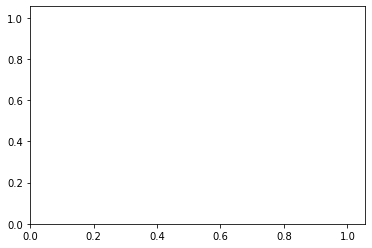

In [32]:
plt.plot(1,1, "r")
plt.ylim(0)
plt.xlim(0)


In [33]:
lista = []
mejor_resultado = 0
def hallar_utilidad(x1, x2, x3):
  utilidad = (x1-1)**3 + 2*(x2) - (x3)**2 #función a maximizar
  return utilidad
inicio = time.time()
combina = []
for p1 in s1:
  for p2 in s1:
    for p3 in s1:
      if (p1*p2*p3)<=6 and (p1*p2*p3)>0: #restricción
        uti = hallar_utilidad(p1, p2, p3)
        combina.append([p1,p2,p3,uti])
        if uti > mejor_resultado:
          mejor_resultado = uti
          lista = [p1,p2,p3] 
print("mejor_resultado", mejor_resultado)
fin = time.time()
print(fin - inicio)
lista   

mejor_resultado 126
0.014414787292480469


[6, 1, 1]

In [34]:
combina

[[1, 1, 1, 1],
 [1, 1, 2, -2],
 [1, 1, 3, -7],
 [1, 1, 4, -14],
 [1, 1, 5, -23],
 [1, 1, 6, -34],
 [1, 2, 1, 3],
 [1, 2, 2, 0],
 [1, 2, 3, -5],
 [1, 3, 1, 5],
 [1, 3, 2, 2],
 [1, 4, 1, 7],
 [1, 5, 1, 9],
 [1, 6, 1, 11],
 [2, 1, 1, 2],
 [2, 1, 2, -1],
 [2, 1, 3, -6],
 [2, 2, 1, 4],
 [2, 3, 1, 6],
 [3, 1, 1, 9],
 [3, 1, 2, 6],
 [3, 2, 1, 11],
 [4, 1, 1, 28],
 [5, 1, 1, 65],
 [6, 1, 1, 126]]

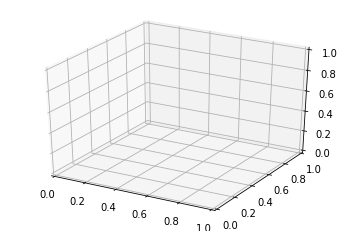

In [35]:
fig = plt.figure()
ax = plt.axes(projection='3d')

In [36]:
def f(x1, x2):
    return  2*(x1)**2 + 6*(x2)-3  

x1 = np.linspace(0, 30, 30)
x2= np.linspace(0, 30, 30)

X1, X2 = np.meshgrid(x1, x2)
Z = f(X1, X2)

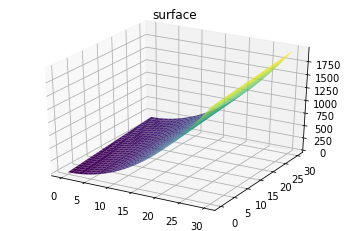

In [37]:
ax = plt.axes(projection='3d')
ax.plot_surface(X1, X2, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

In [38]:
x1 = tf.Variable(200, trainable=True, dtype=tf.float32)
x2 = tf.Variable(200, trainable=True, dtype=tf.float32)
x3 = tf.Variable(200, trainable=True, dtype=tf.float32)
@tf.function
def f():
  return 2*(x1)**2 + 6*(x2) - 3*(x3)**3
for a in range(3000):
  print([x1.numpy(),x2.numpy(),x3.numpy(), f().numpy()])
  opt = gradient_descent.GradientDescentOptimizer(0.1).minimize(f)

[200.0, 200.0, 200.0, -23918800.0]
[120.0, 199.4, 36200.0, -142313770000000.0]
[72.0, 198.79999, 1179432300.0, -4.9219853e+27]
[43.2, 198.19998, 1.2519545e+18, -inf]
[25.92, 197.59998, 1.4106511e+36, -inf]
[15.552, 196.99997, inf, -inf]
[9.3312, 196.39996, inf, -inf]
[5.5987196, 195.79996, inf, -inf]
[3.3592317, 195.19995, inf, -inf]
[2.015539, 194.59995, inf, -inf]
[1.2093233, 193.99994, inf, -inf]
[0.725594, 193.39993, inf, -inf]
[0.43535638, 192.79993, inf, -inf]
[0.26121384, 192.19992, inf, -inf]
[0.1567283, 191.59991, inf, -inf]
[0.094036974, 190.99991, inf, -inf]
[0.056422185, 190.3999, inf, -inf]
[0.03385331, 189.7999, inf, -inf]
[0.020311987, 189.19989, inf, -inf]
[0.012187192, 188.59988, inf, -inf]
[0.007312315, 187.99988, inf, -inf]
[0.004387389, 187.39987, inf, -inf]
[0.0026324333, 186.79987, inf, -inf]
[0.00157946, 186.19986, inf, -inf]
[0.00094767596, 185.59985, inf, -inf]
[0.00056860555, 184.99985, inf, -inf]
[0.00034116334, 184.39984, inf, -inf]
[0.000204698, 183.79984, 

In [39]:
datos = {"e" : [0,0.6,0.25,0.1,0.2,0.25,0.6,0.5],
         "g" : [0,0.6,0.9,0.6,0.4,0.9,0.6,0.9],
         "a" : [0,0.5,0.7,0.5,0.6,0.7,0.5,0.4]}
valores = []
combinaciones = []
mejor_res = 0
for e in range (0,8):
  for g in range (0,8):
    for a in range (0,8):
      if (e+g+a)<=7 and g>=2 and e>= 2 and a>=1:
        resultado = datos['e'][e] * datos['g'][g] * datos['a'][a]
        combinaciones.append([datos['e'][e], datos['g'][g], datos['a'][a], resultado, 'valores', e, g, a])
        if resultado > mejor_res:
          mejor_res = resultado
          valores = [[datos['e'][e], datos['g'][g], datos['a'][a]], ['valores', e, g, a]]

In [40]:
print(mejor_res, valores)

0.1575 [[0.25, 0.9, 0.7], ['valores', 2, 2, 2]]


In [41]:
combinaciones

[[0.25, 0.9, 0.5, 0.1125, 'valores', 2, 2, 1],
 [0.25, 0.9, 0.7, 0.1575, 'valores', 2, 2, 2],
 [0.25, 0.9, 0.5, 0.1125, 'valores', 2, 2, 3],
 [0.25, 0.6, 0.5, 0.075, 'valores', 2, 3, 1],
 [0.25, 0.6, 0.7, 0.105, 'valores', 2, 3, 2],
 [0.25, 0.4, 0.5, 0.05, 'valores', 2, 4, 1],
 [0.1, 0.9, 0.5, 0.045000000000000005, 'valores', 3, 2, 1],
 [0.1, 0.9, 0.7, 0.063, 'valores', 3, 2, 2],
 [0.1, 0.6, 0.5, 0.03, 'valores', 3, 3, 1],
 [0.2, 0.9, 0.5, 0.09000000000000001, 'valores', 4, 2, 1]]

In [42]:
from scipy.optimize import minimize
def func(x):
  x1 = x[0]
  x2 = x[1]
  x3 = x[2]
  result = -((4*x1-x1**2) + (4*x2-x2**2) + (4*x3-x3**2))
  return result
def cons1(x):
  return -x[0] - x[1] - x[2] + 5
def cons2(x):
  return x[0]>=0 and x[1]>=0 and x[2]>=0

In [43]:
x = [10,5,4]
print(func(x))

65


In [44]:
li = (0, 5000)
limit = (li, li, li)
con1 = {'type':'eq', 'fun':cons1}
sol = minimize(func, x, method='SLSQP', bounds = limit, constraints=con1)

In [45]:
print(sol)

     fun: -11.66666665092286
     jac: array([-0.66648531, -0.66667449, -0.66683996])
 message: 'Optimization terminated successfully'
    nfev: 25
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([1.6667573 , 1.66666272, 1.66657998])


In [46]:
def f(x1,x2):
  x = [x1, x2]
  result = 0
  for xn in x:
    result = result + (4*xn - xn**2)  
  return result + (4*1.66655554 - 1.66655554**2)  
x1 = np.linspace(0, 5, 100)
x2= np.linspace(0, 5, 100)

X1, X2 = np.meshgrid(x1, x2)
Z = f(X1, X2)

In [47]:
def plotear(h, v):
  ax = plt.axes(projection='3d')
  ax.plot_surface(X1, X2, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
  ax.set_title('surface')
  ax.view_init(elev=h, azim=v)
  plt.show()

In [48]:
from ipywidgets import interactive
iplot = interactive(plotear,
                    h = (-100, 100, 1),
                    v = (-100, 100, 1))
iplot

interactive(children=(IntSlider(value=0, description='h', min=-100), IntSlider(value=0, description='v', min=-…

In [49]:
def color_3D_projection(
        data_projection,
        variable_data,
        title,
        color_map='jet'):
    '''
    Plot a 3d scatter plot, each point being neural activity at a certain
    time bin, colored by the corresponding behavioral variable
    '''
    x, y, z = np.split(data_projection, 3, axis=1)
    fig = plt.figure(title[:3])
    ax = Axes3D(fig)
    p = ax.scatter(x, y, z, s=20, alpha=0.25, c=variable_data, cmap=color_map)
    fig.colorbar(p)
    ax.set_title(title, fontsize=18)
    plt.show()
    return ax 

In [50]:
def animate_sgd(num_examples, batch_size, steps, learning_rate,
                true_w=3.0, true_b=2.0, seed=0):
    # Define model
    class Model(object):
        def __init__(self, w_init=-1.0, b_init=-1.0):
            self.W = tf.Variable(w_init)
            self.b = tf.Variable(b_init)

        def __call__(self, x):
            return self.W * x + self.b
            
    def loss(target_y, predicted_y):
        return tf.reduce_mean(tf.square(target_y - predicted_y))

    def train(model, inputs, outputs, learning_rate):
        with tf.GradientTape() as t:
            current_loss = loss(outputs, model(inputs))
            dW, db = t.gradient(current_loss, [model.W, model.b])
            model.W.assign_sub(learning_rate * dW)
            model.b.assign_sub(learning_rate * db)
    # Data
    inputs  = tf.random.normal(shape=[num_examples], seed=seed)
    noise   = tf.random.normal(shape=[num_examples], seed=seed+1)
    outputs = inputs * true_w + true_b + noise
    ds = (tf.data.Dataset
          .from_tensor_slices((inputs, outputs))
          .shuffle(1000, seed=seed)
          .batch(batch_size)
          .repeat())
    ds = iter(ds)
    model = Model()
    # Collect the history of W-values and b-values to plot later
    Ws, bs, xs, ys, ls = [], [], [], [], []
    # Construct plot
    fig = plt.figure(dpi=100, figsize=(8, 3))

    # Regression Line
    ax1 = fig.add_subplot(131)
    ax1.set_title("Fitted Line")
    ax1.set_xlabel("x")
    ax1.set_ylabel("y")
    ax1.set_xlim(-3, 2.5)
    ax1.set_ylim(-8, 11)
    p10, = ax1.plot(inputs, outputs, 'r.', alpha=0.1) # full dataset
    p11, = ax1.plot([], [], 'C3.') # batch, color Red
    p12, = ax1.plot([], [], 'k') # fitted line, color Black

    # Loss
    ax2 = fig.add_subplot(132)
    ax2.set_title("Training Loss")
    ax2.set_xlabel("Batches Seen")
    ax2.set_xlim(0, steps)
    ax2.set_ylim(0, 40)
    p20, = ax2.plot([], [], 'C0') # color Blue

    # Weights
    ax3 = fig.add_subplot(133)
    ax3.set_title("Weights")
    ax3.set_xlabel("Batches Seen")
    ax3.set_xlim(0, steps)     # 
    ax3.set_ylim(-2, 4)
    ax3.plot(range(steps), [true_w for _ in range(steps)], 'C5--')
    ax3.plot(range(steps), [true_b for _ in range(steps)], 'C8--')
    p30, = ax3.plot([], [], 'C5') # W color Brown
    p30.set_label('W')
    p31, = ax3.plot([], [], 'C8') # b color Green
    p31.set_label('b')
    ax3.legend()

    fig.tight_layout()

    def init():
        return [p10]

    def update(epoch):
        x, y = next(ds)
        y_pred = model(x)
        current_loss = loss(y, y_pred)
          
        Ws.append(model.W.numpy())
        bs.append(model.b.numpy())
        xs.append(x.numpy())
        ys.append(y_pred.numpy())
        ls.append(current_loss.numpy())
        p11.set_data(x.numpy(), y.numpy())
        inputs = tf.linspace(-3.0, 2.5, 30)
        p12.set_data(inputs, Ws[-1]*inputs + bs[-1])
        p20.set_data(range(epoch), ls)
        p30.set_data(range(epoch), Ws)
        p31.set_data(range(epoch), bs)

        train(model, x, y, learning_rate=learning_rate)
        #   print('Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f' %
        #         (epoch, Ws[-1], bs[-1], current_loss))
        
        return p11, p12, p20

    ani = animation.FuncAnimation(
        fig,
        update,
        frames=range(1, steps),
        init_func=init,
        blit=True,
        interval=100,
    )
    plt.close()
    return ani

In [51]:
def operar (x1,x2,x3):
  return ((4*x1-x1**2) + (4*x2-x2**2) + (4*x3-x3**2))
mejor = 0
abc = []
comx = []
for a in range(0,5):
  for b in range(0,5):
    for c in range(0,5):
      if (a+b+c) <=5:
        resulta = operar(a,b,c)
        comx.append([a,b,c, resulta])
        if resulta > mejor:
          mejor = resulta
          abc = [a,b,c]
print(abc, mejor)

[1, 2, 2] 11


In [52]:
comx

[[0, 0, 0, 0],
 [0, 0, 1, 3],
 [0, 0, 2, 4],
 [0, 0, 3, 3],
 [0, 0, 4, 0],
 [0, 1, 0, 3],
 [0, 1, 1, 6],
 [0, 1, 2, 7],
 [0, 1, 3, 6],
 [0, 1, 4, 3],
 [0, 2, 0, 4],
 [0, 2, 1, 7],
 [0, 2, 2, 8],
 [0, 2, 3, 7],
 [0, 3, 0, 3],
 [0, 3, 1, 6],
 [0, 3, 2, 7],
 [0, 4, 0, 0],
 [0, 4, 1, 3],
 [1, 0, 0, 3],
 [1, 0, 1, 6],
 [1, 0, 2, 7],
 [1, 0, 3, 6],
 [1, 0, 4, 3],
 [1, 1, 0, 6],
 [1, 1, 1, 9],
 [1, 1, 2, 10],
 [1, 1, 3, 9],
 [1, 2, 0, 7],
 [1, 2, 1, 10],
 [1, 2, 2, 11],
 [1, 3, 0, 6],
 [1, 3, 1, 9],
 [1, 4, 0, 3],
 [2, 0, 0, 4],
 [2, 0, 1, 7],
 [2, 0, 2, 8],
 [2, 0, 3, 7],
 [2, 1, 0, 7],
 [2, 1, 1, 10],
 [2, 1, 2, 11],
 [2, 2, 0, 8],
 [2, 2, 1, 11],
 [2, 3, 0, 7],
 [3, 0, 0, 3],
 [3, 0, 1, 6],
 [3, 0, 2, 7],
 [3, 1, 0, 6],
 [3, 1, 1, 9],
 [3, 2, 0, 7],
 [4, 0, 0, 0],
 [4, 0, 1, 3],
 [4, 1, 0, 3]]